What is the model improvement of data-augmentation in regards to different types of data? (audio,images,tabular,tabular (low-dimensionalty))

# Creation of synthetic data

In [92]:
from matplotlib import pyplot as plt
from scipy.stats import randint
import pandas as pd 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [93]:
low_x1, high_x1 = 70,120

low_y1, high_y1 = 70,120


low_x2, high_x2 = 10,60

low_y2, high_y2 = 10,60

amount_of_samples = 100

rx_1 = randint.rvs(low_x1, high_x1, size=amount_of_samples)
ry_1 = randint.rvs(low_y1, high_y1, size=amount_of_samples)

rx_2 = randint.rvs(low_x2, high_x2, size=int(amount_of_samples/2))
ry_2 = randint.rvs(low_y2, high_y2, size=int(amount_of_samples/2))

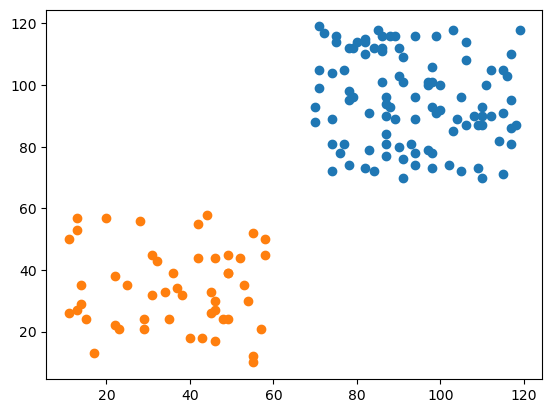

In [94]:
group_nr0 = ["0"] * amount_of_samples
group_nr1 = ["1"] * int(amount_of_samples/2)
first_group = list(zip(rx_1, ry_1, group_nr0))
second_group = list(zip(rx_2, ry_2, group_nr1))



plt.scatter(rx_1, ry_1)
plt.scatter(rx_2, ry_2)
plt.show()

In [95]:
for list_elem in second_group:
    first_group.append(list_elem)
print(first_group)

[(77, 105, '0'), (117, 86, '0'), (83, 79, '0'), (104, 89, '0'), (97, 100, '0'), (110, 93, '0'), (105, 72, '0'), (102, 74, '0'), (87, 96, '0'), (84, 72, '0'), (98, 93, '0'), (98, 101, '0'), (77, 81, '0'), (118, 87, '0'), (87, 94, '0'), (82, 115, '0'), (75, 114, '0'), (115, 105, '0'), (94, 78, '0'), (89, 116, '0'), (103, 118, '0'), (82, 110, '0'), (87, 77, '0'), (70, 93, '0'), (100, 92, '0'), (87, 84, '0'), (87, 81, '0'), (110, 90, '0'), (71, 119, '0'), (90, 103, '0'), (105, 96, '0'), (78, 98, '0'), (83, 91, '0'), (93, 81, '0'), (78, 112, '0'), (97, 101, '0'), (90, 80, '0'), (79, 112, '0'), (71, 99, '0'), (115, 91, '0'), (109, 87, '0'), (106, 87, '0'), (70, 88, '0'), (85, 118, '0'), (97, 79, '0'), (78, 95, '0'), (115, 71, '0'), (99, 116, '0'), (106, 108, '0'), (94, 74, '0'), (100, 100, '0'), (79, 96, '0'), (86, 116, '0'), (108, 90, '0'), (90, 112, '0'), (88, 93, '0'), (99, 91, '0'), (117, 110, '0'), (111, 100, '0'), (89, 89, '0'), (71, 105, '0'), (86, 111, '0'), (112, 90, '0'), (74, 89, 

In [96]:
block_data = pd.DataFrame(first_group, columns  =['x', 'y', "group"])

In [97]:
display(block_data)

,x,y,group
0,77,105,0
1,117,86,0
2,83,79,0
3,104,89,0
4,97,100,0
...,...,...,...
145,49,39,1
146,43,18,1
147,22,22,1
148,46,17,1


In [98]:
train, test = train_test_split(block_data, test_size=0.8)


In [99]:
print(train)

       x    y group
78    86  101     0
22    87   77     0
144   29   21     1
8     87   96     0
79    91  101     0
75    86  112     0
70    87   90     0
48   106  108     0
43    85  118     0
13   118   87     0
133   37   34     1
18    94   78     0
44    97   79     0
103   17   13     1
49    94   74     0
143   42   55     1
113   53   35     1
56    99   91     0
101   54   30     1
16    75  114     0
112   49   45     1
53   108   90     0
92    98  106     0
63    74   89     0
111   48   24     1
11    98  101     0
14    87   94     0
123   45   33     1
96    91  109     0
1    117   86     0


In [100]:
X_train = train.drop(['group'], axis=1)
X_test = test.drop(['group'], axis=1)

y_train = train['group']
y_test = test['group']
